In [1]:
##Import Statement

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import torch
import torch.nn as nn

In [2]:
#Parameters

RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)

torch.manual_seed(RANDOM_STATE)

#torch has no batch-size

EPOCHS = 2000
TEST_SIZE = 0.2

In [3]:
data_df = pd.read_csv("/home/pgdai/Desktop/March24-DAI-Workspace/DNN-May24/input/machine_learning/wine.csv", header=None)

In [4]:
data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    int64  
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    int64  
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
data_df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [7]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
1,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
2,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
3,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
4,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
5,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
6,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
7,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
8,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
9,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [8]:
for col in data_df.columns:
    print(f"Col:{col} | {data_df[col].unique()}")

Col:0 | [14.23 13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12
 13.75 14.75 14.38 13.63 14.3  13.83 14.19 13.64 12.93 13.71 12.85 13.5
 13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48 13.28
 13.07 14.22 13.56 13.41 13.88 14.21 13.9  13.94 13.82 13.77 13.74 13.29
 13.72 12.37 12.33 12.64 13.67 12.17 13.11 13.34 12.21 12.29 13.49 12.99
 11.96 11.66 13.03 11.84 12.7  12.   12.72 12.08 12.67 12.16 11.65 11.64
 12.69 11.62 12.47 11.81 12.6  12.34 11.82 12.51 12.42 12.25 12.22 11.61
 11.46 12.52 11.76 11.41 11.03 12.77 11.45 11.56 11.87 12.07 12.43 11.79
 12.04 12.86 12.88 12.81 12.53 12.84 13.36 13.52 13.62 12.87 13.32 13.08
 12.79 13.23 12.58 13.17 13.84 12.45 14.34 12.36 13.69 12.96 13.78 13.45
 12.82 13.4  12.2  14.16 13.27 14.13]
Col:1 | [1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 1.48 1.73 1.81
 1.92 1.57 1.59 3.1  1.63 3.8  1.86 1.6  2.05 1.77 1.72 1.9  1.68 1.5
 1.66 1.83 1.53 1.8  1.65 3.99 3.84 1.89 3.98 4.04 3.59 2.02 1.75 1.67
 1.7 

In [9]:
data_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
1,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
2,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
3,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
4,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
5,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
6,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
7,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
8,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
9,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


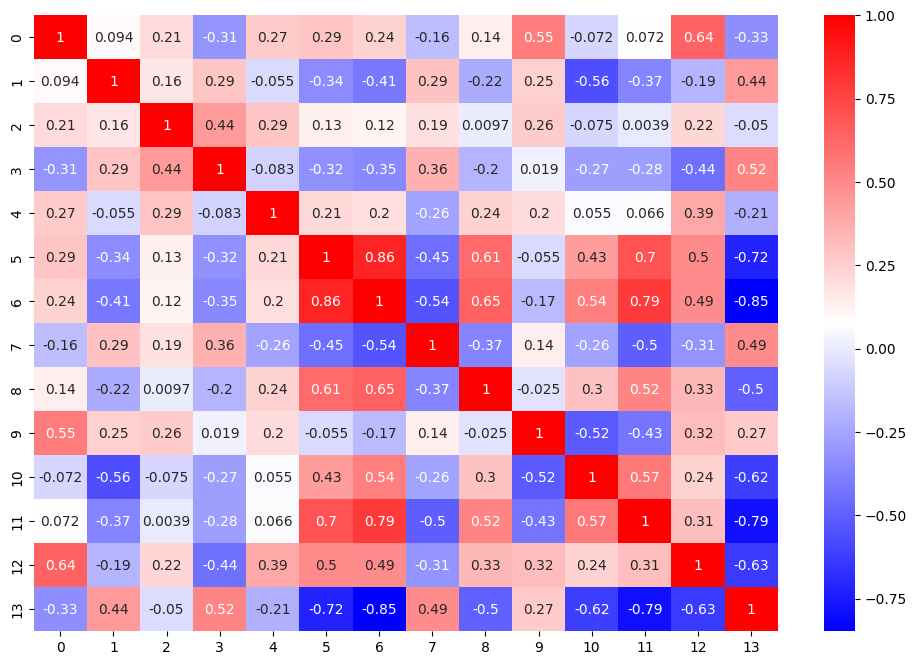

In [10]:

plt.figure(figsize=(12,8))
sns.heatmap(data_df.corr(), annot=True, cmap='bwr');

In [11]:
le = LabelEncoder()
labels = le.fit_transform(data_df[data_df.columns[-1]])
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [12]:
features_df = data_df.drop(data_df.columns[-1], axis=1)
features_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [13]:
X_train, X_test, y_train, y_test = train_test_split(features_df, labels,
                                                     test_size=TEST_SIZE,
                                                      stratify=labels, 
                                                      random_state=RANDOM_STATE)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [14]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# y_train = y_train.to_numpy() #Converting series object to Numpy array
# y_test = y_test.to_numpy()

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)


In [15]:
no_dense_layer = (features_df.shape[1]-3)/2+3
no_dense_layer

8.0

In [16]:
model = nn.Sequential( #Sequential is a model and in Torch we have to give shape (specifically columns) of our features_df
 nn.Linear(X_train.shape[1], 8),
 nn.ReLU(),
 nn.Linear(8, 3)
)
model
     

Sequential(
  (0): Linear(in_features=13, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=3, bias=True)
)

In [17]:
# nn.Sequential?

In [18]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters()) #if you miss one bracket it will give very strange error

/home/pgdai/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [19]:
train_X = torch.tensor(X_train, dtype=torch.float32) #tensorflow implicitly converts to tensor data but not PyTorch
train_y = torch.tensor(y_train, dtype=torch.int64) #int32 can give error

test_X = torch.tensor(X_test, dtype=torch.float32) #tensorflow implicitly converts to tensor data but not PyTorch
test_y = torch.tensor(y_test, dtype=torch.int64)

In [20]:
#Always a good idea to test your models
pred = model(train_X[:1])
pred

tensor([[ 0.3531, -0.3311, -0.2378]], grad_fn=<AddmmBackward0>)

In [21]:
loss_fn(pred, train_y[:1]).detach().item()

1.4061098098754883

In [22]:
loss_o, loss_t = [], []

for epoch in range(EPOCHS): #EPOCHS
    
    model.train()
    outputs = model(train_X)

    loss = loss_fn(outputs, train_y)

    # display(loss) #tensor(0.0006, grad_fn=<NllLossBackward0>)
    # display(loss.detach().item()) #0.0006241924129426479
    loss_o.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

    with torch.no_grad():
        model.eval()
        outputs = model(test_X)
        t_loss = loss_fn(outputs, test_y)
        loss_t.append(t_loss.item())

    print(f"Epoch: {epoch:2d} | Loss: {loss: .4f}|{t_loss: .6f}")

Epoch:  0 | Loss:  1.1113| 1.068801
Epoch:  1 | Loss:  1.1052| 1.062945
Epoch:  2 | Loss:  1.0992| 1.057132
Epoch:  3 | Loss:  1.0933| 1.051419
Epoch:  4 | Loss:  1.0874| 1.045748
Epoch:  5 | Loss:  1.0816| 1.040152
Epoch:  6 | Loss:  1.0759| 1.034601
Epoch:  7 | Loss:  1.0702| 1.029071
Epoch:  8 | Loss:  1.0646| 1.023564
Epoch:  9 | Loss:  1.0591| 1.018079
Epoch: 10 | Loss:  1.0536| 1.012593
Epoch: 11 | Loss:  1.0481| 1.007113
Epoch: 12 | Loss:  1.0427| 1.001605
Epoch: 13 | Loss:  1.0373| 0.996111
Epoch: 14 | Loss:  1.0319| 0.990646
Epoch: 15 | Loss:  1.0265| 0.985250
Epoch: 16 | Loss:  1.0212| 0.979895
Epoch: 17 | Loss:  1.0159| 0.974546
Epoch: 18 | Loss:  1.0107| 0.969207
Epoch: 19 | Loss:  1.0054| 0.963880
Epoch: 20 | Loss:  1.0002| 0.958562
Epoch: 21 | Loss:  0.9951| 0.953252
Epoch: 22 | Loss:  0.9900| 0.947954
Epoch: 23 | Loss:  0.9849| 0.942803
Epoch: 24 | Loss:  0.9798| 0.937659
Epoch: 25 | Loss:  0.9748| 0.932537
Epoch: 26 | Loss:  0.9697| 0.927447
Epoch: 27 | Loss:  0.9647| 0

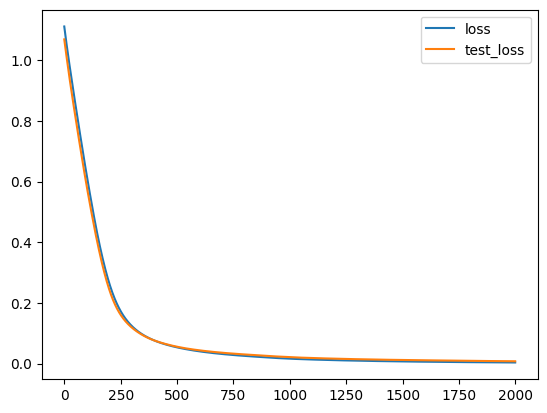

In [32]:
loss_df = pd.DataFrame({"loss":loss_o, "test_loss": loss_t})
loss_df.plot();

## Evaluate

In [24]:
pred = model(test_X)
type(pred)

torch.Tensor

In [25]:
pred

tensor([[ -7.7930,   7.4565,  -8.0731],
        [ -3.6224,  -1.9967,   5.0974],
        [ -7.6028,   7.3296,  -7.4936],
        [  4.5296,  -2.4038,  -4.3416],
        [  9.3554,  -5.6156,  -5.1400],
        [ -4.5012,   1.8938,  -0.3910],
        [ -1.9178,  -5.0104,   7.3700],
        [ -0.0423,   2.9844,  -7.0147],
        [  4.4041,  -2.1300,  -3.4746],
        [  6.2616,  -4.2025,  -4.5332],
        [ -3.5420,   3.5214,  -5.8504],
        [ -2.8710,   3.6988,  -5.6338],
        [ -3.6157,  -3.1727,   6.4838],
        [  5.7065,  -3.3837,  -3.6335],
        [ -8.4084,   8.0452,  -8.6050],
        [ -2.6244,  -4.0524,   7.3581],
        [  9.6093,  -6.2027,  -5.0677],
        [ -2.8658,  -1.4524,   4.1292],
        [  6.5912,  -3.9804,  -3.6036],
        [  5.7091,  -3.4035,  -3.0698],
        [ -7.4088,   7.0692,  -7.8939],
        [ -5.4941,   5.9269,  -7.9376],
        [ -4.8217,   5.5194,  -7.4141],
        [  4.0735,  -1.5844,  -3.4352],
        [  5.8728,  -3.2404,  -3.4072],


In [26]:
pred.shape

torch.Size([36, 3])

In [27]:
pred.detach() ## attach function goes away

tensor([[ -7.7930,   7.4565,  -8.0731],
        [ -3.6224,  -1.9967,   5.0974],
        [ -7.6028,   7.3296,  -7.4936],
        [  4.5296,  -2.4038,  -4.3416],
        [  9.3554,  -5.6156,  -5.1400],
        [ -4.5012,   1.8938,  -0.3910],
        [ -1.9178,  -5.0104,   7.3700],
        [ -0.0423,   2.9844,  -7.0147],
        [  4.4041,  -2.1300,  -3.4746],
        [  6.2616,  -4.2025,  -4.5332],
        [ -3.5420,   3.5214,  -5.8504],
        [ -2.8710,   3.6988,  -5.6338],
        [ -3.6157,  -3.1727,   6.4838],
        [  5.7065,  -3.3837,  -3.6335],
        [ -8.4084,   8.0452,  -8.6050],
        [ -2.6244,  -4.0524,   7.3581],
        [  9.6093,  -6.2027,  -5.0677],
        [ -2.8658,  -1.4524,   4.1292],
        [  6.5912,  -3.9804,  -3.6036],
        [  5.7091,  -3.4035,  -3.0698],
        [ -7.4088,   7.0692,  -7.8939],
        [ -5.4941,   5.9269,  -7.9376],
        [ -4.8217,   5.5194,  -7.4141],
        [  4.0735,  -1.5844,  -3.4352],
        [  5.8728,  -3.2404,  -3.4072],


In [28]:
y_pred = pred.detach().numpy().argmax(axis =1)

In [29]:
accuracy_score(y_pred, y_test)

1.0

In [30]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [31]:
confusion_matrix(y_pred, y_test)

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 10]])